In [1]:
import tensorflow as tf
from time import time
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.pipeline import Pipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

from mlxtend import evaluate, plotting

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

y = train['label']
X = train.drop(columns='label', axis=1)

X = np.array(X / 255.0, dtype=np.float32)
test = test.drop(columns='id', axis=1)

X_train,X_val,y_train,y_val=train_test_split(X,y,shuffle=True,test_size=0.2)
X_test = np.array(test / 255.0, dtype=np.float32)

In [3]:
def output(y_pred, filename=''):
    submission = pd.read_csv("sample_submission.csv")
    submission['label'] = y_pred
    submission.to_csv(filename,index=False)
    return

In [4]:
plt.rcParams['figure.figsize'] = [8, 8]

def ann(model):
    model.compile(optimizer=Adam(0.005), #safe choice
    loss='sparse_categorical_crossentropy', #doesnt need one-hot encoding
    metrics=['accuracy']) #kaggle's metric
    
    start = time()
    r = model.fit(X_train, y_train, 
                  validation_data=(X_val, y_val), #validate on validation set
                  epochs=20,
                  verbose=0)
    stop = time()
        
    #convert array of probabilities of each class to the prediction
    y_pred =  np.argmax(model.predict(X_val), axis=1) 
    
    #look at loss and accuracy scores for training and validation sets
    a=model.evaluate(X_train, y_train, verbose=0, return_dict=True)
    b=model.evaluate(X_val, y_val, verbose=0, return_dict=True)
    scores=pd.DataFrame([a, b], index=['train', 'test'])

    print(classification_report(y_val, y_pred))
    
    #make multiclass confusion matrix
    cm = evaluate.confusion_matrix(y_val, y_pred, binary=False)
    plotting.plot_confusion_matrix(conf_mat=cm)
    plt.show()
    
    #make loss and acc plots versus epochs.
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='loss')
    plt.plot(r.history['val_loss'], label='val_loss')
    plt.legend()
    plt.subplot(2, 2, 2)
    plt.plot(r.history['accuracy'], label='accuracy')
    plt.plot(r.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.show();
    
    print('Model fit time:', stop-start)
    return scores

#### Initialize model

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1193
           1       0.98      0.99      0.98      1229
           2       0.99      0.99      0.99      1187
           3       0.92      0.96      0.94      1175
           4       0.97      0.97      0.97      1165
           5       0.97      0.97      0.97      1197
           6       0.91      0.95      0.93      1204
           7       0.95      0.87      0.91      1189
           8       0.98      0.98      0.98      1246
           9       0.97      0.98      0.97      1215

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000



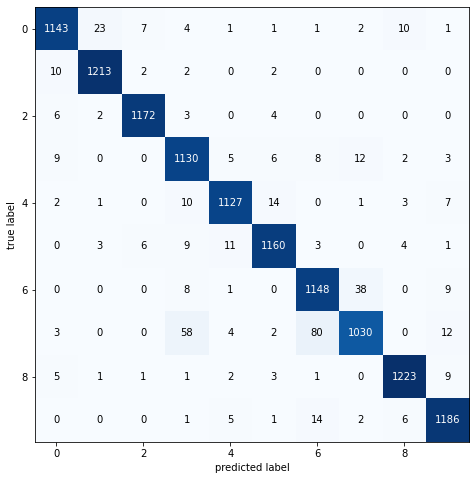

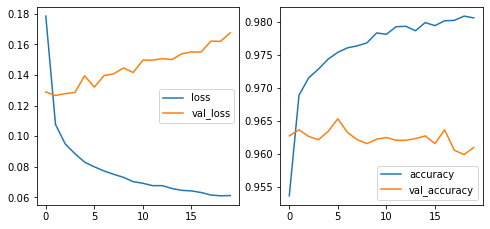

Model fit time: 19.429942846298218


,loss,accuracy
train,0.054242,0.983125
test,0.167582,0.961000


In [5]:
#No hidden layers
model0 = Sequential()
model0.add(Dense(10, activation='softmax'))

ann(model0)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1193
           1       0.98      0.99      0.98      1229
           2       0.99      0.99      0.99      1187
           3       0.96      0.96      0.96      1175
           4       0.97      0.99      0.98      1165
           5       0.98      0.97      0.98      1197
           6       0.94      0.98      0.96      1204
           7       0.96      0.94      0.95      1189
           8       0.99      0.99      0.99      1246
           9       0.99      0.97      0.98      1215

    accuracy                           0.98     12000
   macro avg       0.98      0.97      0.97     12000
weighted avg       0.98      0.98      0.98     12000



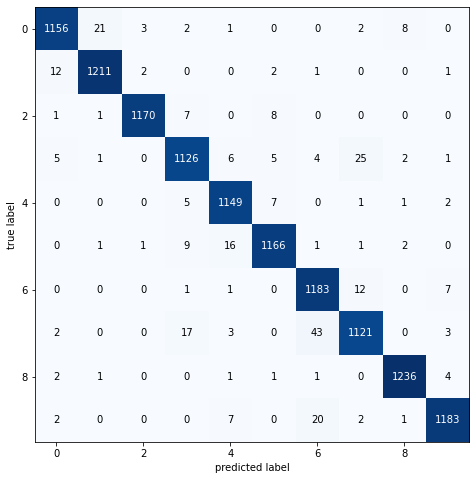

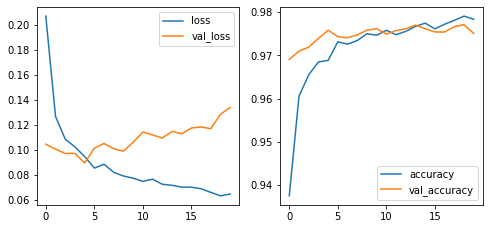

Model fit time: 21.536877155303955


,loss,accuracy
train,0.021885,0.992688
test,0.133951,0.975083


In [6]:
#1 hidden layer, 32 nodes
model1 = Sequential()
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2)) #reduce oversampling 
model1.add(Dense(10, activation='softmax'))

ann(model1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1193
           1       0.98      1.00      0.99      1229
           2       1.00      0.99      1.00      1187
           3       0.98      0.97      0.98      1175
           4       0.99      0.99      0.99      1165
           5       0.98      0.99      0.98      1197
           6       0.95      0.98      0.97      1204
           7       0.98      0.95      0.96      1189
           8       0.99      0.99      0.99      1246
           9       0.99      0.98      0.99      1215

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



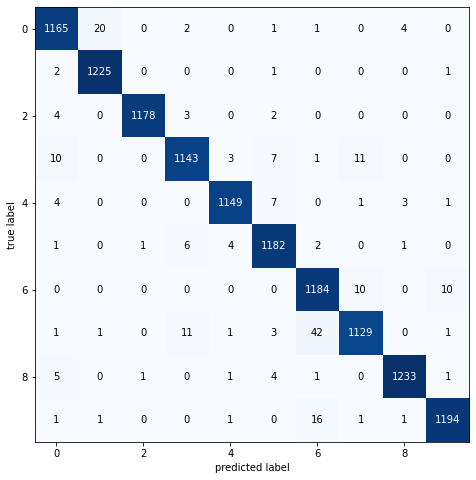

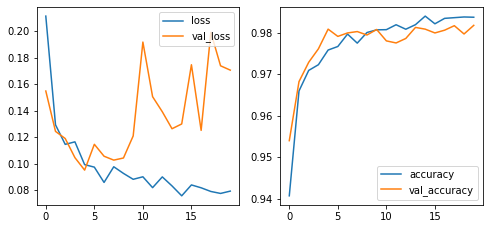

Model fit time: 26.308008432388306


,loss,accuracy
train,0.020162,0.994417
test,0.170696,0.981833


In [7]:
#3 hidden layers, 128 nodes

model2 = Sequential()
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu')) 
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu')) 
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

ann(model2)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1193
           1       0.98      0.99      0.99      1229
           2       1.00      0.99      0.99      1187
           3       0.98      0.98      0.98      1175
           4       0.99      0.99      0.99      1165
           5       0.99      0.99      0.99      1197
           6       0.98      0.97      0.98      1204
           7       0.97      0.98      0.97      1189
           8       1.00      0.99      0.99      1246
           9       0.99      0.99      0.99      1215

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



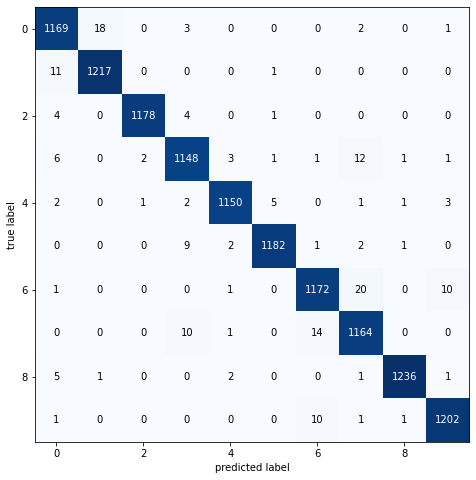

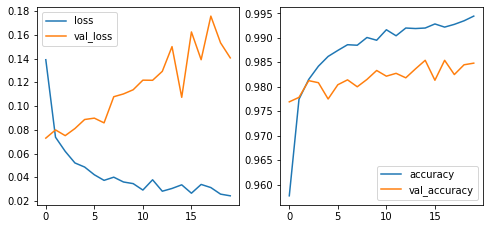

Model fit time: 21.877169132232666


,loss,accuracy
train,0.002388,0.999167
test,0.140625,0.984833


In [8]:
#1 hidden layer, 128 nodes
model3 = Sequential()
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

ann(model3)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1193
           1       0.97      1.00      0.99      1229
           2       1.00      0.99      0.99      1187
           3       0.96      0.96      0.96      1175
           4       0.99      0.97      0.98      1165
           5       0.97      0.98      0.98      1197
           6       0.94      0.98      0.96      1204
           7       0.96      0.93      0.94      1189
           8       0.98      0.99      0.98      1246
           9       0.99      0.98      0.98      1215

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



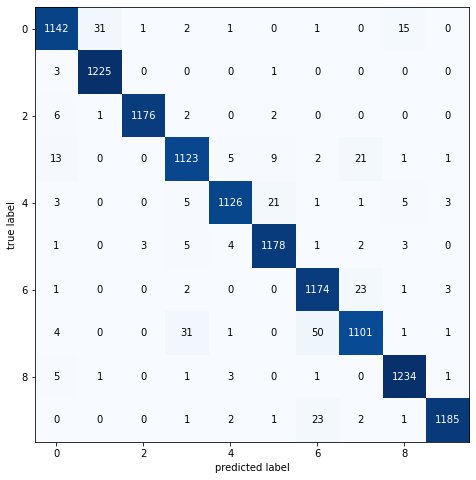

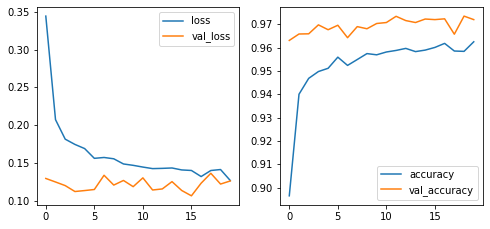

Model fit time: 26.292011976242065


,loss,accuracy
train,0.055828,0.98575
test,0.126124,0.97200


In [9]:
#3 hidden layers, 32 nodes

model4 = Sequential()
model4.add(Dense(32, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(32, activation='relu')) 
model4.add(Dropout(0.2))
model4.add(Dense(32, activation='relu')) 
model4.add(Dropout(0.2))
model4.add(Dense(10, activation='softmax'))

ann(model4)